In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import joblib
import seaborn as sns

In [2]:
data=pd.read_csv("station_day.csv")
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [3]:
data1=pd.read_csv("stations.csv")
data1.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [4]:
# 1. Perform the merge as usual
data = pd.merge(data, data1[['StationId', 'City']], on='StationId', how='left')

# 2. "Pop" the City column (removes it from the end and saves it)
city_col = data.pop('City')

# 3. Insert it at index 1 (the 2nd column position)
data.insert(1, 'City', city_col)

display(data.head())

,StationId,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [5]:
# Print unique cities
print(data['StationId'].unique())
print(data['City'].unique())

['AP001' 'AP005' 'AS001' 'BR005' 'BR006' 'BR007' 'BR008' 'BR009' 'BR010'
 'CH001' 'DL001' 'DL002' 'DL003' 'DL004' 'DL005' 'DL006' 'DL007' 'DL008'
 'DL009' 'DL010' 'DL011' 'DL012' 'DL013' 'DL014' 'DL015' 'DL016' 'DL017'
 'DL018' 'DL019' 'DL020' 'DL021' 'DL022' 'DL023' 'DL024' 'DL025' 'DL026'
 'DL027' 'DL028' 'DL029' 'DL030' 'DL031' 'DL032' 'DL033' 'DL034' 'DL035'
 'DL036' 'DL037' 'DL038' 'GJ001' 'HR011' 'HR012' 'HR013' 'HR014' 'JH001'
 'KA002' 'KA003' 'KA004' 'KA005' 'KA006' 'KA007' 'KA008' 'KA009' 'KA010'
 'KA011' 'KL002' 'KL004' 'KL007' 'KL008' 'MH005' 'MH006' 'MH007' 'MH008'
 'MH009' 'MH010' 'MH011' 'MH012' 'MH013' 'MH014' 'ML001' 'MP001' 'MZ001'
 'OD001' 'OD002' 'PB001' 'RJ004' 'RJ005' 'RJ006' 'TG001' 'TG002' 'TG003'
 'TG004' 'TG005' 'TG006' 'TN001' 'TN002' 'TN003' 'TN004' 'TN005' 'UP012'
 'UP013' 'UP014' 'UP015' 'UP016' 'WB007' 'WB008' 'WB009' 'WB010' 'WB011'
 'WB012' 'WB013']
['Amaravati' 'Visakhapatnam' 'Guwahati' 'Patna' 'Chandigarh' 'Delhi'
 'Ahmedabad' 'Gurugram' 'Jorapokhar' 

In [6]:
# Check if any StationId failed to get a City
missing_cities = data[data['City'].isnull()]['StationId'].unique()

if len(missing_cities) == 0:
    print("✅ All Station IDs matched a City perfectly!")
else:
    print(f"⚠️ These Station IDs have no matching city: {missing_cities}")

✅ All Station IDs matched a City perfectly!


In [7]:
data.head()

,StationId,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [8]:
# List of columns we don't need for a simple prediction model
cols_to_drop = [
    'StationId',   # Not a physical value, just a label
    # 'Benzene',     # Not used in standard Indian AQI formula
    # 'Toluene',     # Not used in standard Indian AQI formula
    'Xylene',      # Not used in standard Indian AQI formula
    'AQI_Bucket',  # This is a text label; our AI will calculate the number instead
    # 'NOx',         # Redundant if we already have NO2
    # 'NO',         # Redundant if we already have NO2
]

# Droping the column

df=data.drop(columns=cols_to_drop, axis=1, errors='ignore')



In [9]:

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,NaN
1,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,184.0
2,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,197.0
3,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,198.0
4,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,188.0


In [10]:
# 1. Total number of rows in the dataset
total_rows = len(df)

# 2. Total number of columns
total_cols = len(df.columns)

# 3. Calculate missing values and their percentage
missing_data = df.isnull().sum()
missing_percentage = (missing_data / total_rows) * 100

# 4. Combine into a nice table
stats = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage.round(2)
})

print(f"Total Columns: {total_cols}")
print(f"Total Rows: {total_rows}")
print("-" * 30)
print(stats)

Total Columns: 14
Total Rows: 108035
------------------------------
         Missing Values  Percentage (%)
City                  0            0.00
Date                  0            0.00
PM2.5             21625           20.02
PM10              42706           39.53
NO                17106           15.83
NO2               16547           15.32
NOx               15500           14.35
NH3               48105           44.53
CO                12998           12.03
SO2               25204           23.33
O3                25568           23.67
Benzene           31455           29.12
Toluene           38702           35.82
AQI               21010           19.45


In [12]:
df.dropna(subset=['AQI'], inplace=True)


In [13]:
print(df.isnull().sum())

total_rows = len(df)

print("Total rows:", total_rows)

City           0
Date           0
PM2.5       3488
PM10       23961
NO          2229
NO2         1566
NOx         4555
NH3        29832
CO          2896
SO2         9533
O3          9598
Benzene    19787
Toluene    26324
AQI            0
dtype: int64
Total rows: 87025


In [14]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

for p in pollutants:
    df[p] = df.groupby('City')[p].transform(lambda x: x.fillna(x.mean()))

# 4. Final Safety: If a city has NO data at all for a pollutant,
# fill the remaining NaNs with the global mean
df = df.fillna(df.mean(numeric_only=True))

print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64


In [15]:


# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, Day as new features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Date_'] = df['Date'].dt.day

# Drop the original 'Date' column as its information is now in new features
df = df.drop('Date', axis=1)

df.head()
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
Year       0
Month      0
Date_      0
dtype: int64


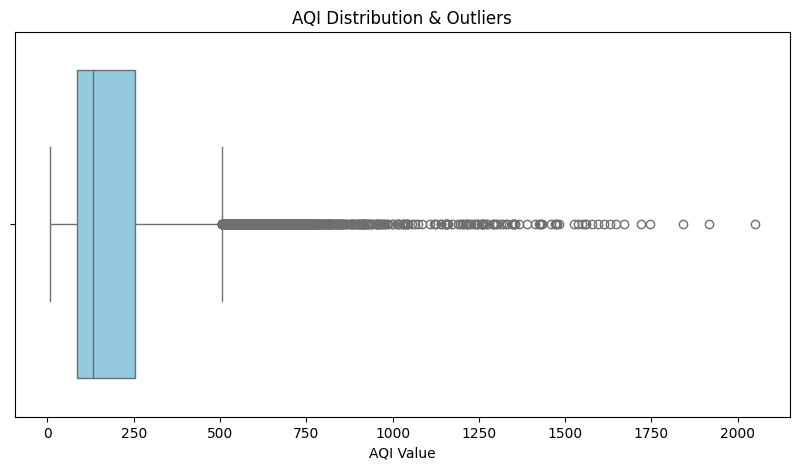

Lower Bound: -166.00
Upper Bound: 506.00
Total number of outliers: 1795 (out of 87025 rows)
Percentage of data that are outliers: 2.06%


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualize Outliers with a Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['AQI'], color='skyblue')
plt.title('AQI Distribution & Outliers')
plt.xlabel('AQI Value')
plt.show()

# 2. Calculate the number of outliers using IQR
Q1 = df['AQI'].quantile(0.25)
Q3 = df['AQI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['AQI'] < lower_bound) | (df['AQI'] > upper_bound)]

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Total number of outliers: {len(outliers)} (out of {len(df)} rows)")
print(f"Percentage of data that are outliers: {(len(outliers)/len(df))*100:.2f}%")

In [17]:
df['AQI'] = df['AQI'].clip(lower=0, upper=506)

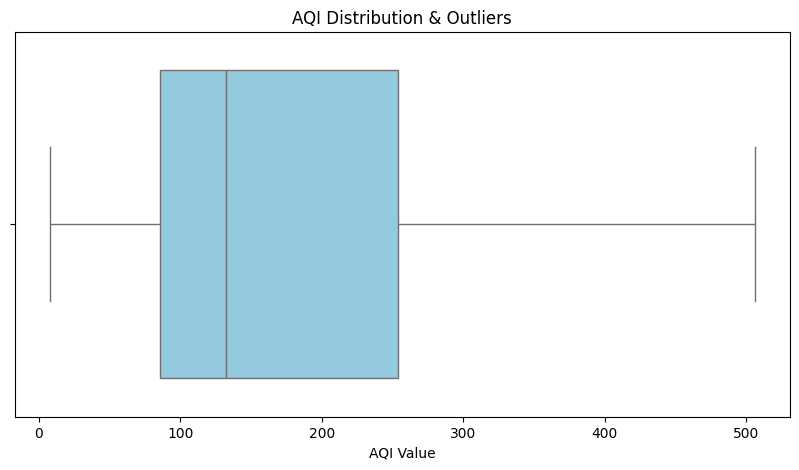

Lower Bound: -166.00
Upper Bound: 506.00
Total number of outliers: 0 (out of 87025 rows)
Percentage of data that are outliers: 0.00%


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualize Outliers with a Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['AQI'], color='skyblue')
plt.title('AQI Distribution & Outliers')
plt.xlabel('AQI Value')
plt.show()

# 2. Calculate the number of outliers using IQR
Q1 = df['AQI'].quantile(0.25)
Q3 = df['AQI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['AQI'] < lower_bound) | (df['AQI'] > upper_bound)]

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Total number of outliers: {len(outliers)} (out of {len(df)} rows)")
print(f"Percentage of data that are outliers: {(len(outliers)/len(df))*100:.2f}%")


--- Analysis for PM2.5 ---
Outliers: 6591 | 7.57% of data
Typical Range: -65.43 to 196.89



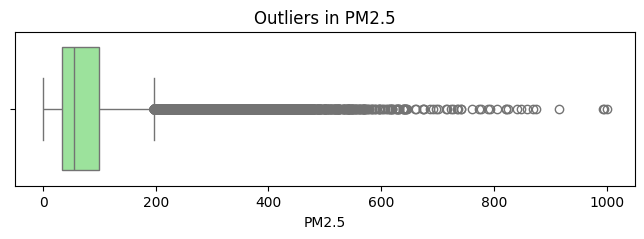

--- Analysis for PM10 ---
Outliers: 3920 | 4.50% of data
Typical Range: -112.00 to 385.71



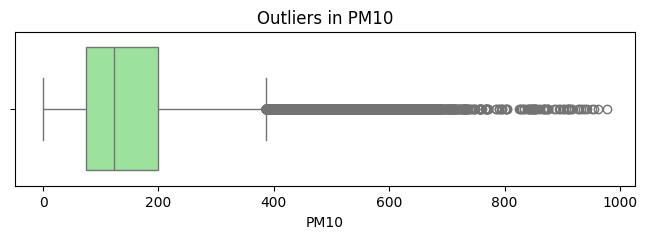

--- Analysis for NO ---
Outliers: 9387 | 10.79% of data
Typical Range: -25.26 to 55.22



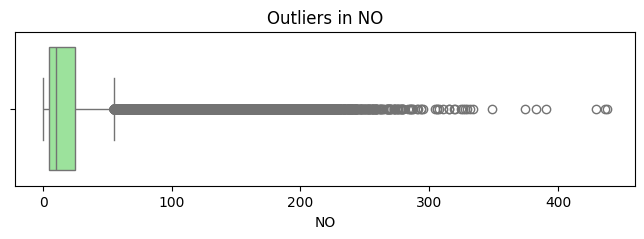

--- Analysis for NO2 ---
Outliers: 3677 | 4.23% of data
Typical Range: -31.20 to 92.80



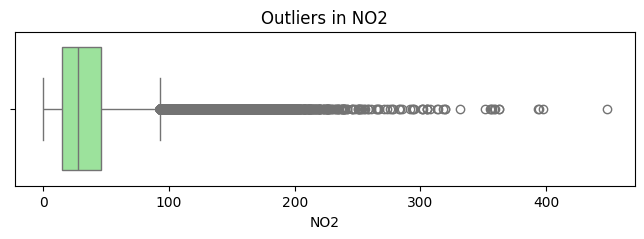

--- Analysis for NOx ---
Outliers: 7422 | 8.53% of data
Typical Range: -36.20 to 103.40



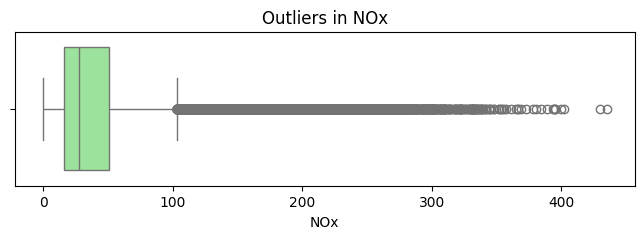

--- Analysis for NH3 ---
Outliers: 2356 | 2.71% of data
Typical Range: -19.58 to 74.01



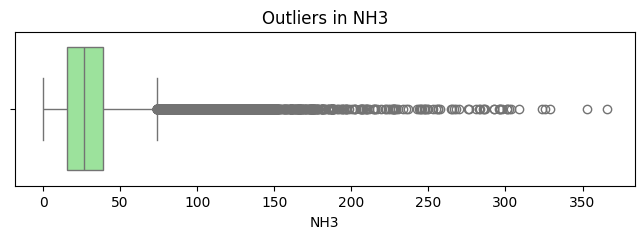

--- Analysis for CO ---
Outliers: 5604 | 6.44% of data
Typical Range: -0.72 to 2.83



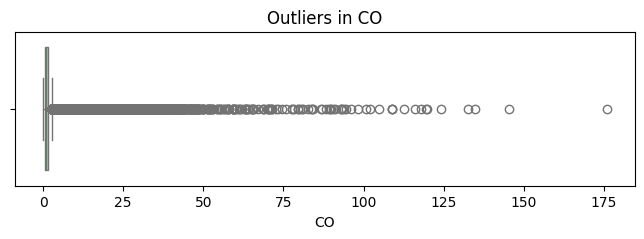

--- Analysis for SO2 ---
Outliers: 5699 | 6.55% of data
Typical Range: -7.83 to 27.80



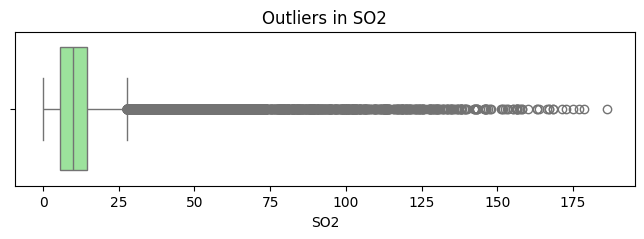

--- Analysis for O3 ---
Outliers: 3848 | 4.42% of data
Typical Range: -16.19 to 81.28



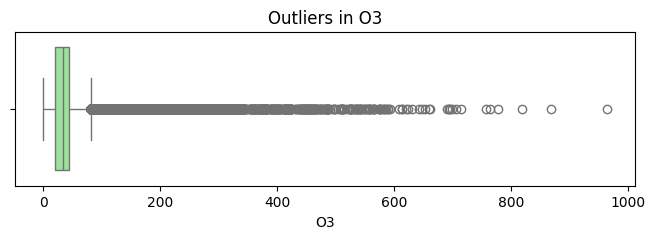

--- Analysis for Benzene ---
Outliers: 6120 | 7.03% of data
Typical Range: -4.41 to 8.64



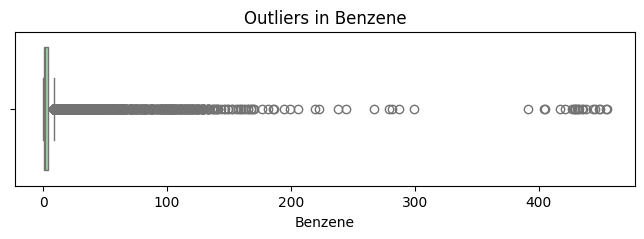

--- Analysis for Toluene ---
Outliers: 4325 | 4.97% of data
Typical Range: -29.61 to 55.16



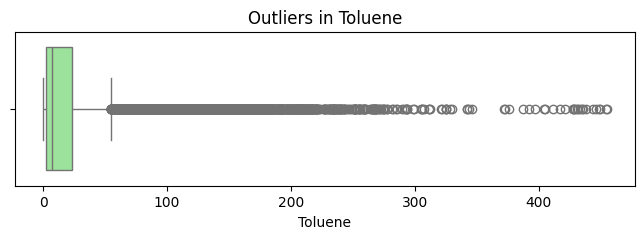

In [20]:
# List of all your pollutant columns
cols_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

for col in cols_to_check:
    # 1. Calculate IQR for the current column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 2. Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # 3. Print Results
    print(f"--- Analysis for {col} ---")
    print(f"Outliers: {len(outliers)} | { (len(outliers)/len(df))*100:.2f}% of data")
    print(f"Typical Range: {lower_bound:.2f} to {upper_bound:.2f}\n")

    # 4. Optional: Visualize (only if you want 13 separate plots)
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Outliers in {col}')
    plt.show()

In [22]:
import numpy as np

# List of all your pollutant columns
cols_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # We focus on Upper Bound since air quality values can't be below 0
    upper_bound = Q3 + 1.5 * IQR

    # Capping: If value > upper_bound, replace with upper_bound, else keep original
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers capped in the original DataFrame.")

Outliers capped in the original DataFrame.


--- Analysis for PM2.5 ---
Outliers: 0 | 0.00% of data
Typical Range: -65.43 to 196.89



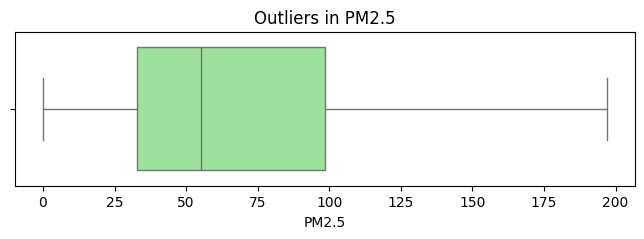

--- Analysis for PM10 ---
Outliers: 0 | 0.00% of data
Typical Range: -112.00 to 385.71



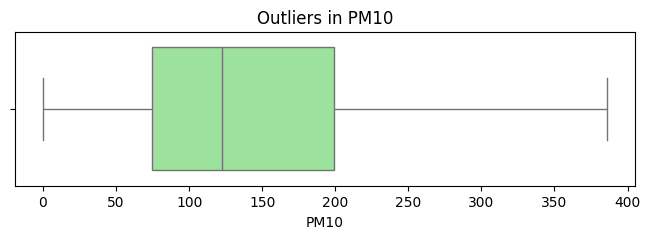

--- Analysis for NO ---
Outliers: 0 | 0.00% of data
Typical Range: -25.26 to 55.22



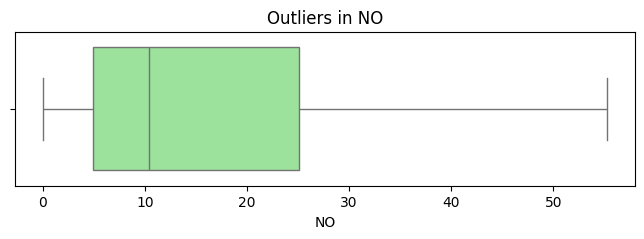

--- Analysis for NO2 ---
Outliers: 0 | 0.00% of data
Typical Range: -31.20 to 92.80



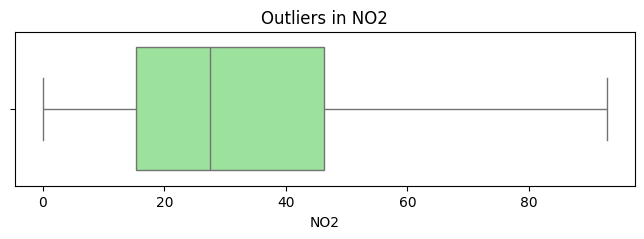

--- Analysis for NOx ---
Outliers: 0 | 0.00% of data
Typical Range: -36.20 to 103.40



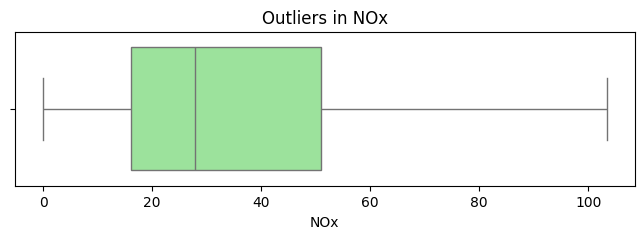

--- Analysis for NH3 ---
Outliers: 0 | 0.00% of data
Typical Range: -19.58 to 74.01



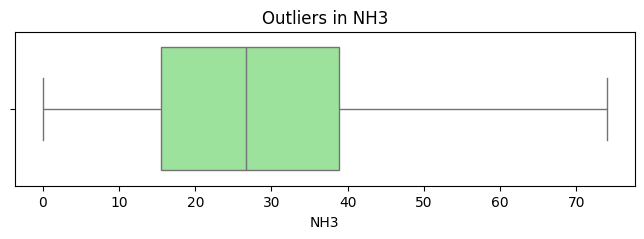

--- Analysis for CO ---
Outliers: 0 | 0.00% of data
Typical Range: -0.72 to 2.83



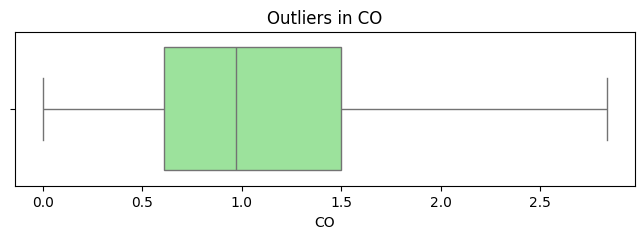

--- Analysis for SO2 ---
Outliers: 0 | 0.00% of data
Typical Range: -7.83 to 27.80



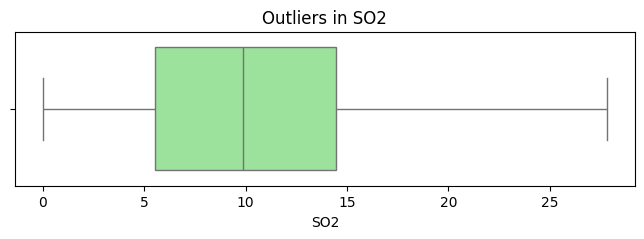

--- Analysis for O3 ---
Outliers: 0 | 0.00% of data
Typical Range: -16.19 to 81.28



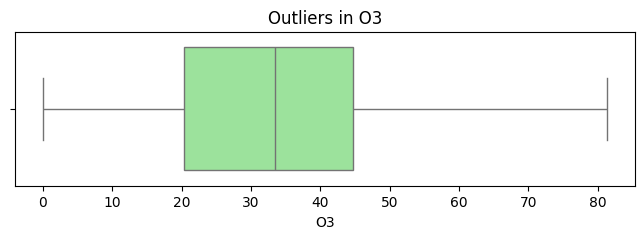

--- Analysis for Benzene ---
Outliers: 0 | 0.00% of data
Typical Range: -4.41 to 8.64



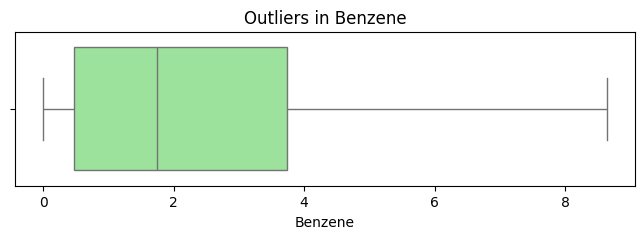

--- Analysis for Toluene ---
Outliers: 0 | 0.00% of data
Typical Range: -29.61 to 55.16



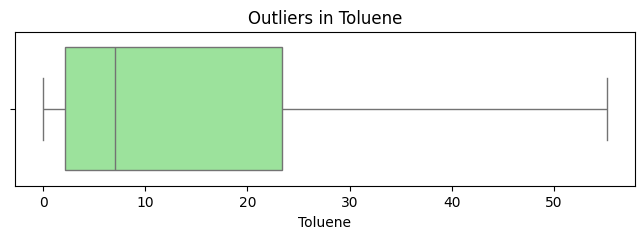

In [23]:
# List of all your pollutant columns
cols_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

for col in cols_to_check:
    # 1. Calculate IQR for the current column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 2. Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # 3. Print Results
    print(f"--- Analysis for {col} ---")
    print(f"Outliers: {len(outliers)} | { (len(outliers)/len(df))*100:.2f}% of data")
    print(f"Typical Range: {lower_bound:.2f} to {upper_bound:.2f}\n")

    # 4. Optional: Visualize (only if you want 13 separate plots)
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Outliers in {col}')
    plt.show()

In [24]:
2# Features (independent value) and target (dependent value)

# User's specified features, excluding PM2.5 and PM10
x=df[["City","Year","Month","Date_"]]
y=df["AQI"]

# Perform one-hot encoding on the 'City' column
x = pd.get_dummies(x, columns=['City'], drop_first=True)

In [25]:
# spliting

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [26]:
# Initialize the RandomForestRegressor model
# You can tune parameters like n_estimators, max_depth, etc.
model = RandomForestRegressor(
    n_estimators=650,      # More trees often lead to a smoother average
    max_depth=35,          # Put a ceiling on how complex each tree can get
    min_samples_leaf=6,    # Prevents trees from creating nodes for just 1-2 data points
    max_features='sqrt',   # Reduces correlation between trees (improves generalization)
    random_state=42,
    n_jobs=-1
)

# Train the model
model.fit(x_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [27]:
# Predicting
y_pred = model.predict(x_test)
y_pred


array([317.04886023, 101.62697379, 120.75821746, ...,  77.48871791,
       275.41400441, 260.35543251])

In [28]:
# caculate Mean square

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

# calculate r2_square value

r2_score= r2_score(y_test,y_pred)
print("R2 Score:",r2_score)

# calculate mean absolute error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:",mae)



Mean Squared Error: 2682.675292837728
R2 Score: 0.8164870571025324
MAE: 35.99115052375057


In [29]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
# Calculate R2 for the training data

train_r2 = r2_score(y_train, model.predict(x_train))

# Calculate R2 for the testing data (what you already calculated)
test_r2 = r2_score(y_test, y_pred)

print(f"Training R2 Score: {train_r2:.4f}")
print(f"Test R2 Score:     {test_r2:.4f}")

# Calculate the 'Gap'
gap = train_r2 - test_r2
print(f"The Gap is: {gap:.4f}")

Training R2 Score: 0.8366
Test R2 Score:     0.8165
The Gap is: 0.0201


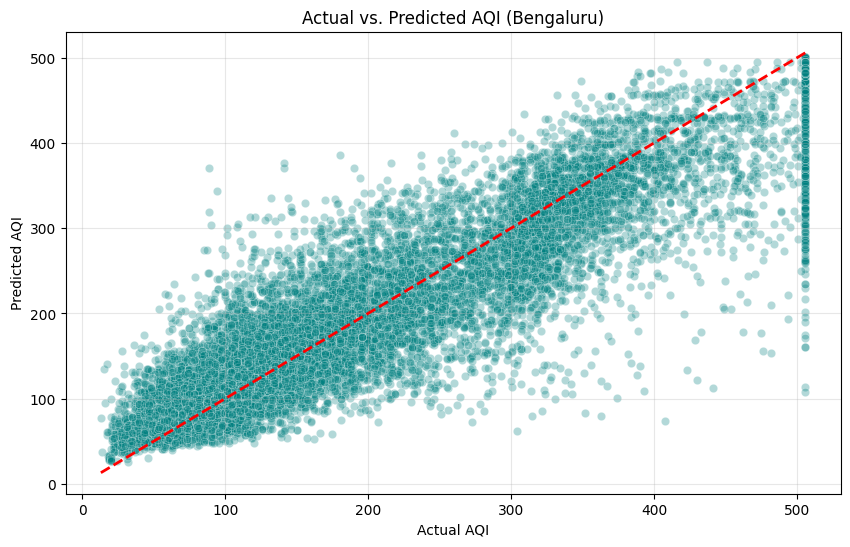

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='teal')

# Add a "Perfect Prediction" line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')

plt.title('Actual vs. Predicted AQI (Bengaluru)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
import joblib
joblib.dump(model,"AQI_Forecasting.pkl")

model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')


['model_columns.pkl']

In [34]:
import joblib
import pandas as pd

# --- LOADING THE MODEL ---
try:
    loaded_model = joblib.load('AQI_Forecasting.pkl')
    # Use loaded_model_1 which you saved as your column list
    feature_names = joblib.load('model_columns.pkl')
    print("🚀 Model loaded successfully!")
except FileNotFoundError:
    print("❌ Error: Files not found.")

def predict_aqi_interactive():
    print("--- 🌍 AQI Prediction Tool ---")

    try:
        # 1. Collect inputs (Added City input here)
        user_city = input("Enter City Name: ")

        data = {
            #  'PM2.5': [float(input("Enter PM2.5: "))],
            #  'PM10': [float(input("Enter PM10: "))],
            #  'NO2': [float(input("Enter NO2: "))],
            #  'CO': [float(input("Enter CO: "))],
            #  'SO2': [float(input("Enter SO2: "))],
            #  'O3': [float(input("Enter O3: "))],
             'Month': [int(input("Enter Month (1-12): "))],
             'Date_': [int(input("Enter Day (1-31): "))], # Changed 'Day' to 'Date_'
             'Year': [int(input("Enter Year: "))]
        }

        # 2. Create DataFrame with ALL expected columns (including the 25+ City columns)
        # We initialize them all to 0
        input_df = pd.DataFrame(0, index=[0], columns=feature_names)

        # Fill in the numerical values from our 'data' dictionary
        for key in data:
            input_df[key] = data[key]

        # --- INSERT THESE TWO LINES HERE ---
        city_col = f"City_{user_city}"
        if city_col in input_df.columns: input_df[city_col] = 1
        # -----------------------------------

        # 3. Make the prediction
        prediction = loaded_model.predict(input_df)[0]

        # 4. Determine Category
        category = ""
        if prediction <= 50: category = "Good"
        elif prediction <= 100: category = "Satisfactory"
        elif prediction <= 200: category = "Moderate"
        elif prediction <= 300: category = "Poor"
        elif prediction <= 400: category = "Very Poor"
        else: category = "Severe"

        print("\n" + "="*30)
        print(f"🔮 Predicted AQI for {user_city}: {prediction}")
        print(f"📊 Status: {category}")
        print("="*30)

    except ValueError as e:
        print(f"❌ Error: {e}")

predict_aqi_interactive()

🚀 Model loaded successfully!
--- 🌍 AQI Prediction Tool ---
Enter City Name: Bengaluru
Enter Month (1-12): 02
Enter Day (1-31): 11
Enter Year: 2026

🔮 Predicted AQI for Bengaluru: 91.36910026630642
📊 Status: Satisfactory
